In [1]:
import config
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imagePath = os.path.join(config.cwd, "data", "images", "cl8k2u1pm1dw7083203g1b7yv.jpg")
rawImage = cv2.imread(imagePath)

First, it is necessary to convert the image from the original
RGB channel to grey scale to process the subsequent procedure

In [3]:
grayScale = cv2.cvtColor(rawImage, cv2.COLOR_BGR2GRAY)

the proposed approach employs standard thresholding method with a fixed threshold
value to identify specular highlights in all images

In [4]:
threshold = 180
_, thresholded = cv2.threshold(grayScale, threshold, 255, cv2.THRESH_BINARY)

 More specifically, a dilation operation with kernel size 3 × 3
is performed initially to connect the pixels related to undesirable parts.

In [5]:
dilated = cv2.dilate(thresholded, kernel=np.ones((3, 3), np.uint8), iterations=1)

Among the obtained
contours, those whose scaled area following the Modified Z-scores formula [30], as shown in
Formula 1, exceeds 17.0 

In [6]:
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = np.zeros_like(dilated)
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 17: #This may be wrongly calculated
        cv2.drawContours(mask, [contour], -1, 255, -1)

The mask is then passed into another
erosion module with the same settings to restore the initial highlights intensity

In [7]:
eroded = cv2.erode(mask, kernel=np.ones((3, 3), np.uint8), iterations=1)

 Finally, Gaussian
filter of size 19 × 19 is applied to reduce the intensity of highlights area and improve the
inpainting performance.


In [8]:
smoothed = cv2.GaussianBlur(eroded, (19, 19), 0)

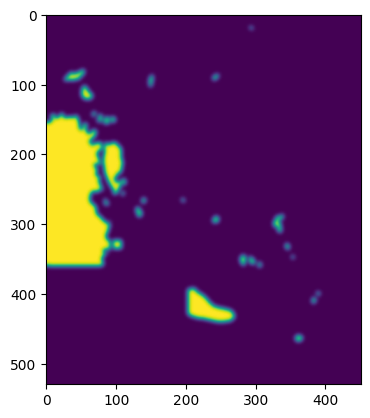

In [9]:
plt.imshow(smoothed)

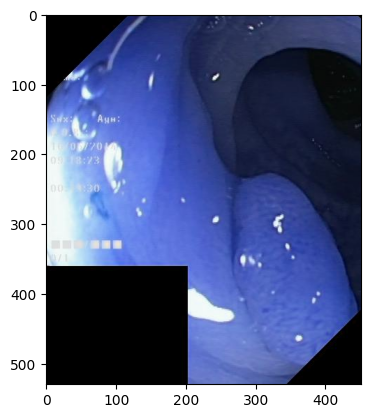

In [10]:
plt.imshow(rawImage)